In [1]:
import numpy
import pandas

In [2]:
!pip install gdown unzip

  Preparing metadata (setup.py) ... done
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1281 sha256=25aacb0fec20c6db5b9ab8fd64db81fdaa1a8a4b570c632a4eaf4fe59396e92d
  Stored in directory: /root/.cache/pip/wheels/3c/4d/b3/ddd83a91322fba02a91898d3b006090d1df1d3b0ad61bd8b36
Successfully built unzip


In [3]:
!gdown 1fuFurVV8rcrVTAFPjhQvzGLNdnTi1jWZ

Downloading...
From (original): https://drive.google.com/uc?id=1fuFurVV8rcrVTAFPjhQvzGLNdnTi1jWZ
From (redirected): https://drive.google.com/uc?id=1fuFurVV8rcrVTAFPjhQvzGLNdnTi1jWZ&confirm=t&uuid=a6c3e0a1-f2d7-457c-98a3-faf57dc9ddb4
To: /content/CATS_DOGS.zip
100% 812M/812M [00:10<00:00, 80.8MB/s]


In [4]:
!unzip -q /content/CATS_DOGS.zip

In [14]:
import os
import torch
from torch.utils.data import Dataset
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

In [9]:
def get_image_paths(directory):
    image_paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith((".jpg", ".jpeg", ".png")):
                image_paths.append(os.path.join(root, file))
    return image_paths

18743
tensor([[[0.2941, 0.2980, 0.2980,  ..., 0.4275, 0.4275, 0.4275],
         [0.2980, 0.2980, 0.3020,  ..., 0.4275, 0.4275, 0.4275],
         [0.3020, 0.3059, 0.3059,  ..., 0.4235, 0.4235, 0.4235],
         ...,
         [0.7569, 0.7569, 0.7608,  ..., 0.6588, 0.6627, 0.6667],
         [0.7529, 0.7569, 0.7569,  ..., 0.6549, 0.6588, 0.6627],
         [0.7529, 0.7529, 0.7569,  ..., 0.6588, 0.6627, 0.6627]],

        [[0.1294, 0.1333, 0.1333,  ..., 0.2353, 0.2353, 0.2353],
         [0.1333, 0.1333, 0.1373,  ..., 0.2353, 0.2353, 0.2353],
         [0.1373, 0.1412, 0.1412,  ..., 0.2353, 0.2353, 0.2353],
         ...,
         [0.6392, 0.6392, 0.6431,  ..., 0.5333, 0.5373, 0.5412],
         [0.6353, 0.6392, 0.6392,  ..., 0.5294, 0.5333, 0.5373],
         [0.6353, 0.6353, 0.6392,  ..., 0.5333, 0.5373, 0.5373]],

        [[0.0314, 0.0353, 0.0353,  ..., 0.1059, 0.1059, 0.1059],
         [0.0353, 0.0353, 0.0392,  ..., 0.1059, 0.1059, 0.1059],
         [0.0392, 0.0431, 0.0431,  ..., 0.0941, 0.09

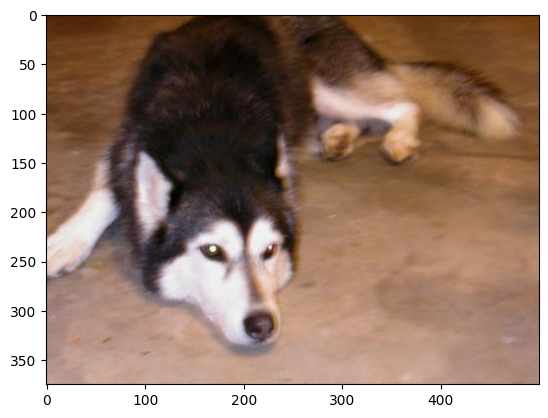

In [23]:
class CatDogDataset(Dataset):
    def __init__(self, image_paths):
        self.image_paths = image_paths
        self.transform = transforms.Compose([
            transforms.ToTensor(),
        ])

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        img = Image.open(img_path).convert("RGB")
        plt.imshow(img)
        img = self.transform(img)
        return img

    def __len__(self):
        return len(self.image_paths)

train_dir = "/content/CATS_DOGS/train"

image_paths = get_image_paths(train_dir)

ds = CatDogDataset(image_paths)

print( len(ds))
print(ds[0])
